In [1]:
import pandas as pd 
import numpy as np 
from dcapy import dca
from dcapy.models import Well, Period, Scenario, WellsGroup, CashFlow, model_from_dict, CashFlowParams
from dcapy.weiner import Brownian, GeometricBrownian, MeanReversion
import seaborn as sns 
from datetime import date
import matplotlib.pyplot as plt
import copy
import yaml
import json
from scipy import stats

In [2]:
with open('FDP_example2.yml','r') as file:
    lp_dict = yaml.load(file)

<ipython-input-2-086174738fc2>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  lp_dict = yaml.load(file)


In [3]:
lp = model_from_dict(lp_dict)

print(type(lp))

<class 'dcapy.models.schedule.WellsGroup'>


In [4]:
sc = lp.scenarios_maker()
sc

[{'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['highfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['highfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['highfr'],
  'well-2': ['mediumfr']},
 {'LP2': ['base'],
  'LP3': ['base'],
  'LP4': ['base'],
  'LP5': ['base'],
  'well-1': ['mediumfr'],
  'well-2': ['mediumfr']}]

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

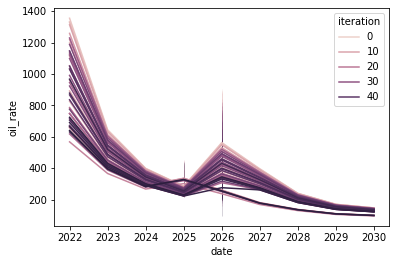

In [5]:
fwn = lp.generate_forecast(wells=sc[3],freq_output='A',iter=50)

w1_f  = fwn.loc[fwn['well']=='well-1',:]

sns.lineplot(data=w1_f, x=w1_f.index.to_timestamp(), y='oil_rate', hue='iteration')

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

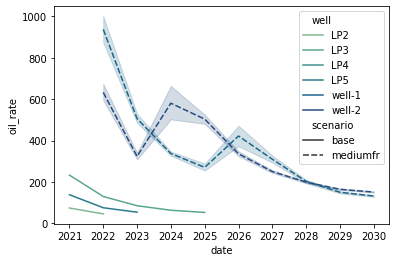

In [6]:
#fwn= lp.generate_forecast(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
fwn= lp.generate_forecast(wells=sc[3],freq_output='A',iter=50)

#fwn
sns.lineplot(data=fwn, x=fwn.index.to_timestamp(), y='oil_rate', hue='well',style='scenario',palette='crest')


In [7]:
#cwn= lp.generate_cashflow(wells={'well-1':['mediumfr'],'well-2':['mediumfr']},freq_output='A')
cwn= lp.generate_cashflow(wells=sc[3],freq_output='A')

In [8]:
fcf_0= cwn[0].fcf()
fcf_0

,income_fdp_field-LP2-base-pdp,income_fdp_field-LP3-base-pdp,income_fdp_field-LP4-base-pdp,income_fdp_field-LP5-base-pdp,income_fdp_field-well-1-mediumfr-uppermir,income_fdp_field-well-1-mediumfr-lowermir,income_fdp_field-well-2-mediumfr-lowermir,income_fdp_field-well-2-mediumfr-uppermir,total_income,fix_opex_fdp_field-LP2-base-pdp,...,capex_drill_fdp_field-well-1-mediumfr-uppermir,capex_wo_fdp_field-well-1-mediumfr-lowermir,capex_abandon_fdp_field-well-1-mediumfr-lowermir,capex_drill_fdp_field-well-2-mediumfr-lowermir,capex_wo_fdp_field-well-2-mediumfr-uppermir,capex_abandon_fdp_field-well-2-mediumfr-uppermir,buy,total_capex,fcf,cum_fcf
2021,1.119039e+06,3.531522e+06,945526.852134,2.093743e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.689831e+06,-132000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-7500000.0,-7700000.0,-1.652637e+06,-1.652637e+06
2022,2.117812e+04,2.483709e+06,0.000000,1.440538e+06,2.549733e+07,0.000000e+00,1.705012e+07,0.000000e+00,4.649288e+07,-132000.0,...,-4000000.0,0.0,0.0,-4000000.0,0.0,0.0,0.0,-8200000.0,3.055634e+07,2.890371e+07
2023,0.000000e+00,1.986732e+06,0.000000,5.299504e+05,1.492277e+07,0.000000e+00,9.196067e+06,1.329463e+07,3.993015e+07,0.0,...,0.0,0.0,0.0,0.0,-600000.0,0.0,0.0,-800000.0,3.348893e+07,6.239264e+07
2024,0.000000e+00,1.077774e+06,0.000000,0.000000e+00,6.782203e+06,0.000000e+00,3.974521e+06,6.270852e+06,1.810535e+07,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.447580e+07,7.686844e+07
2025,0.000000e+00,5.304575e+05,0.000000,0.000000e+00,5.736173e+06,9.057289e+06,0.000000e+00,5.410704e+06,2.073462e+07,0.0,...,0.0,-600000.0,0.0,0.0,0.0,0.0,0.0,-800000.0,1.640774e+07,9.327618e+07
2026,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.507107e+06,3.174593e+06,0.000000e+00,2.557866e+06,8.239566e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.866187e+06,9.914236e+07
2027,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.109921e+06,0.000000e+00,2.007841e+06,4.117762e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.820487e+06,1.019629e+08
2028,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.529147e+06,0.000000e+00,1.616730e+06,3.145877e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.049505e+06,1.040124e+08
2029,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.838144e+06,0.000000e+00,2.089382e+06,3.927526e+06,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.968785e+06,1.069811e+08
2030,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,4.537420e+03,0.000000e+00,5.312315e+03,9.849736e+03,0.0,...,0.0,0.0,-200000.0,0.0,0.0,-200000.0,0.0,-400000.0,-6.559076e+05,1.063252e+08


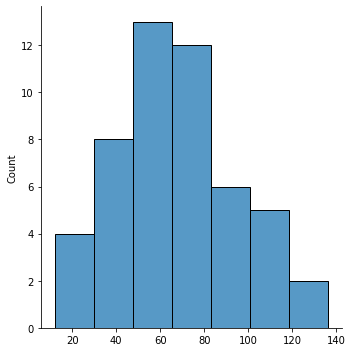

In [9]:
npv = lp.npv([0.15], freq_rate='A', freq_cashflow='A')/1e6

sns.displot(npv['npv'].values)

/home/scuervo/Documents/dev/apps/dcapy/dcapy/models/cashflow.py:322: UserWarning: FixedFormatter should only be used together with FixedLocator
  grax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks])
/home/scuervo/Documents/dev/apps/dcapy/dcapy/models/cashflow.py:330: UserWarning: FixedFormatter should only be used together with FixedLocator
  spax.set_yticklabels([fmt.format(i/format_dict[format]['factor']) for i in ticks_cum])


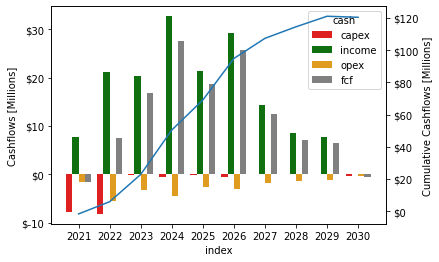

In [14]:
cwn[38].plot(cum=True,format='m')

In [ ]:
cwn[0].get_cashflow_period()

# Weiner

In [ ]:
oil_gb = GeometricBrownian(
    initial_condition = 60,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':0.26}},
    drift = 0.01,
    freq = 'A'
)

In [ ]:
price_gb = oil_gb.generate(12,5, freq_output='A')

price_gb.plot()

In [ ]:
oil_mr = MeanReversion(
    initial_condition = 60,
    ti = date(2021,1,1),
    generator = {'dist':'norm','kw':{'loc':0,'scale':13.13}},
    m=46.77,
    eta=0.112652,
    freq = 'A'
)

In [ ]:
price_mr = oil_mr.generate(12,15, freq_output='A')

price_mr.plot()